#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read the dataset

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df[df['YearsExperience']==10.5]

,YearsExperience,Salary
29,10.5,121872.0


#### Separate input and output variables

In [5]:
x=df[['YearsExperience']]#independent variable ,input data should be 2d
y=df['Salary']#dependent variable,output data shold be of 1d

#### Explore the Data

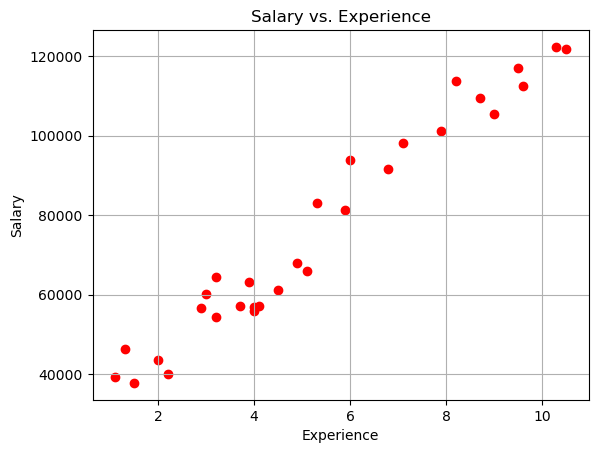

In [6]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='r');

Linear Relationship between Experienc and Salary

In [7]:
df.corr() #correlation coefficient shoul be >0.8 for more likely predictions closer to acutal

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)#by default train percentage is 75% and testing percentage is 25%

In [10]:
x_train.shape

(22, 1)

In [11]:
x_test.shape

(8, 1)

In [12]:
y_train.shape

(22,)

In [13]:
y_test.shape

(8,)

In [14]:
x_train.head()#ranomly input data selected for training

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2


#### Building the Machine Learning model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_model=LinearRegression()

In [17]:
lin_model.fit(x_train,y_train)#training the model with training data

LinearRegression()

In [18]:
#slope
lin_model.coef_

array([9379.71049195])

In [19]:
#intercept
lin_model.intercept_

26986.691316737248

#### Predicting on Unseen data

In [20]:
lin_model.predict([[10.5]])

C:\Users\321as\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125473.65148217])

#### Performance Evaluation

In [21]:
y_pred=lin_model.predict(x_test)

In [22]:
#compare
result=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred,
    'Residual Error':y_pred-y_test
})

In [23]:
result

,Actual,Predicted,Residual Error
2,37731.0,41056.257055,3325.257055
28,122391.0,123597.709384,1206.709384
13,57081.0,65443.504334,8362.504334
10,63218.0,63567.562235,349.562235
26,116969.0,116093.940990,-875.059010
24,109431.0,108590.172597,-840.827403
27,112635.0,117031.912039,4396.912039
11,55794.0,64505.533285,8711.533285


In [24]:
import numpy as np

In [25]:
#mean absolute error
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [26]:
#using prebuilt mean absolute error function from library
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(y_pred,y_test)

3508.5455930660555

In [28]:
#mean absolute error in percentage
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_pred,y_test)

0.05149234772308878

In [29]:
#accuracy of linearity /r2 error of training data
lin_model.score(x_train,y_train)

0.9395413526983522

In [30]:
#accuracy of linearity /r2 error of testing data
lin_model.score(x_test,y_test)

0.9779208335417602

In [31]:
#predict the result using model
y_pred=lin_model.predict(x)

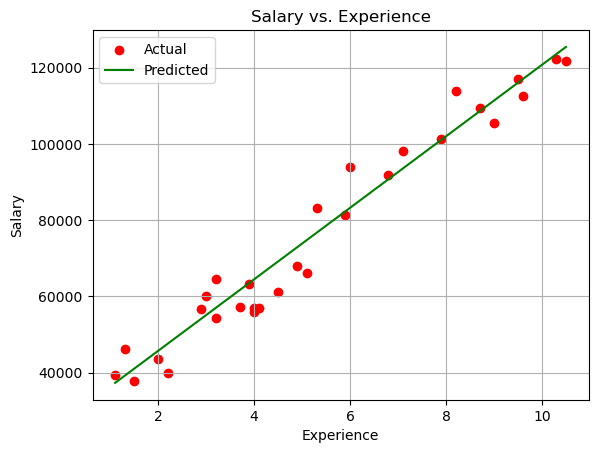

In [32]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='r',label='Actual');
plt.plot(x,y_pred,color='g',label='Predicted');
plt.legend()

In [33]:
lin_model.predict([[15]])

C:\Users\321as\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [34]:
15*lin_model.coef_[0]+lin_model.intercept_

167682.34869592747